In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Data_Test.xlsx")
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [3]:
print(
df.shape,
df_test.shape
)

(6237, 9) (1560, 8)


In [4]:
df.Price.describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [5]:
len(df)

6237

In [6]:
len(df['Title'].unique())

5568

In [7]:
len(df['Author'].unique())

3679

In [8]:
df['Reviews'].unique()

array(['4.0 out of 5 stars', '3.9 out of 5 stars', '4.8 out of 5 stars',
       '4.1 out of 5 stars', '5.0 out of 5 stars', '4.5 out of 5 stars',
       '4.4 out of 5 stars', '4.7 out of 5 stars', '4.2 out of 5 stars',
       '4.9 out of 5 stars', '3.5 out of 5 stars', '3.8 out of 5 stars',
       '4.3 out of 5 stars', '3.1 out of 5 stars', '4.6 out of 5 stars',
       '2.0 out of 5 stars', '3.7 out of 5 stars', '3.2 out of 5 stars',
       '2.6 out of 5 stars', '2.8 out of 5 stars', '3.4 out of 5 stars',
       '2.9 out of 5 stars', '3.3 out of 5 stars', '3.0 out of 5 stars',
       '2.5 out of 5 stars', '1.0 out of 5 stars', '3.6 out of 5 stars',
       '2.7 out of 5 stars', '1.5 out of 5 stars', '2.3 out of 5 stars',
       '1.7 out of 5 stars', '2.2 out of 5 stars', '1.4 out of 5 stars',
       '2.4 out of 5 stars', '1.6 out of 5 stars', '2.1 out of 5 stars'],
      dtype=object)

In [9]:
len(df['Genre'].unique())

345

In [10]:
df['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Paperback,– 26 Sep 2006',
       'Paperback,– 21 Nov 2016', 'Paperback,– 15 Jan 2015'], dtype=object)

In [11]:
df['Book type'] = [i.split(",")[0] for i in df['Edition']]
df['Edition year'] = [i[-4:] for i in df['Edition']]
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Book type,Edition year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006


In [12]:
df['Reviews'] = [i.split()[0] for i in df['Reviews'] ]
df['Ratings'] = [i.split()[0] for i in df['Ratings'] ]


In [13]:
df.drop(['Title','Synopsis','Author','Edition'],axis=1, inplace=True)
df.head()

,Reviews,Ratings,Genre,BookCategory,Price,Book type,Edition year
0,4.0,8,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016
1,3.9,14,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,4.8,6,International Relations,Humour,299.00,Paperback,1982
3,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017
4,5.0,1,Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006


In [14]:
df['Book type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Library Binding             1
(French)                    1
Leather Bound               1
(German)                    1
Board book                  1
Product Bundle              1
(Kannada)                   1
Perfect Paperback           1
Plastic Comb                1
(Spanish)                   1
Name: Book type, dtype: int64

In [15]:
df['Edition year'].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'port', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'mile', ' set',
       'tion', '1964', '1984', '1980', 'dged', '1979', 'rint', '1960',
       '1970', '1975', '1905', '1900', 'book', '1961', '1925', '1973'],
      dtype=object)

In [16]:
df['Edition year'] = [int(i) if i.isdigit() else 0 for i in df['Edition year']]
df['Edition year'] = [abs(df['Edition year'].median()) if i== 0 else i for i in df['Edition year'] ]
df['Edition year'].unique()

array([2016., 2012., 1982., 2017., 2006., 2009., 2018., 2015., 2013.,
       1999., 2002., 2011., 1991., 2014., 1989., 2000., 2005., 2019.,
       2008., 2004., 2010., 2007., 2001., 1969., 1993., 1992., 2003.,
       1996., 1997., 1995., 1987., 1986., 1990., 1988., 1981., 1976.,
       1994., 1998., 1977., 1974., 1983., 1971., 1985., 1978., 1964.,
       1984., 1980., 1979., 1960., 1970., 1975., 1905., 1900., 1961.,
       1925., 1973.])

In [17]:
df['Genre'] = [i if i in df['Genre'].value_counts().head(10).index else "Others" for i in df['Genre']]
df['BookType'] = [i if i in df['Book type'].value_counts().head(5).index else "Others"  for i in df['Book type']  ]
df.head()

,Reviews,Ratings,Genre,BookCategory,Price,Book type,Edition year,BookType
0,4.0,8,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016.0,Paperback
1,3.9,14,Others,"Biographies, Diaries & True Accounts",202.93,Paperback,2012.0,Paperback
2,4.8,6,Others,Humour,299.00,Paperback,1982.0,Paperback
3,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017.0,Paperback
4,5.0,1,Others,"Arts, Film & Photography",965.62,Hardcover,2006.0,Hardcover


In [18]:
df.drop(['Book type'],axis=1,inplace=True)
df.head()

,Reviews,Ratings,Genre,BookCategory,Price,Edition year,BookType
0,4.0,8,Action & Adventure (Books),Action & Adventure,220.00,2016.0,Paperback
1,3.9,14,Others,"Biographies, Diaries & True Accounts",202.93,2012.0,Paperback
2,4.8,6,Others,Humour,299.00,1982.0,Paperback
3,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017.0,Paperback
4,5.0,1,Others,"Arts, Film & Photography",965.62,2006.0,Hardcover


In [19]:
df['EditionYears'] = [2022- i for i in df['Edition year']]
df.drop(['Edition year'],axis=1,inplace=True)
df.head()

,Reviews,Ratings,Genre,BookCategory,Price,BookType,EditionYears
0,4.0,8,Action & Adventure (Books),Action & Adventure,220.00,Paperback,6.0
1,3.9,14,Others,"Biographies, Diaries & True Accounts",202.93,Paperback,10.0
2,4.8,6,Others,Humour,299.00,Paperback,40.0
3,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5.0
4,5.0,1,Others,"Arts, Film & Photography",965.62,Hardcover,16.0


In [20]:
dummy_genre = pd.get_dummies(df.Genre, prefix='Genre')
dummy_BookCategory = pd.get_dummies(df.BookCategory, prefix='BookCategory')
dummy_BookType = pd.get_dummies(df.BookType, prefix='BookType')

df = pd.concat([df,dummy_genre, dummy_BookType,dummy_BookCategory], axis=1)

df.head()

,Reviews,Ratings,Genre,BookCategory,Price,BookType,EditionYears,Genre_Action & Adventure (Books),Genre_Biographies & Autobiographies (Books),Genre_Comics & Mangas (Books),...,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,8,Action & Adventure (Books),Action & Adventure,220.00,Paperback,6.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,14,Others,"Biographies, Diaries & True Accounts",202.93,Paperback,10.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,4.8,6,Others,Humour,299.00,Paperback,40.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5.0,1,Others,"Arts, Film & Photography",965.62,Hardcover,16.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
df.drop(['Genre','BookCategory','BookType'],axis=1,inplace=True)

In [22]:
df['Ratings'] = [int(i.replace(",","")) for i in df['Ratings']]
df['Reviews'] = [float(i) for i in df['Reviews']]

In [23]:
df.head()

,Reviews,Ratings,Price,EditionYears,Genre_Action & Adventure (Books),Genre_Biographies & Autobiographies (Books),Genre_Comics & Mangas (Books),Genre_Contemporary Fiction (Books),"Genre_Crime, Thriller & Mystery (Books)",Genre_Design,...,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,8,220.00,6.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,14,202.93,10.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,4.8,6,299.00,40.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.1,13,180.00,5.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5.0,1,965.62,16.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


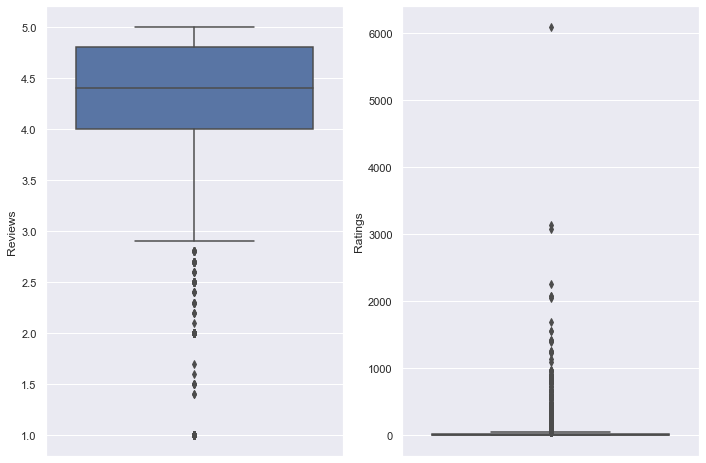

In [24]:
#Handling outliers:

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1,2,1)
ax = sns.boxplot(y=df["Reviews"])
plt.subplot(1,2,2)
ax = sns.boxplot(y=df["Ratings"])

In [25]:
for i in df['Ratings']:
    q1 = df['Ratings'].quantile(0.25)
    q3 = df['Ratings'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5*iqr
    Upper_tail = q3 + 1.5*iqr
    if i > Upper_tail or i < Lower_tail:
        df['Ratings'] = df['Ratings'].replace(i,np.median(df['Ratings']))
        
for i in df['Reviews']:
    q1 = df['Reviews'].quantile(0.25)
    q3 = df['Reviews'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5*iqr
    Upper_tail = q3 + 1.5*iqr
    if i > Upper_tail or i < Lower_tail:
        df['Reviews'] = df['Reviews'].replace(i,np.median(df['Reviews']))


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot after mean imputation')

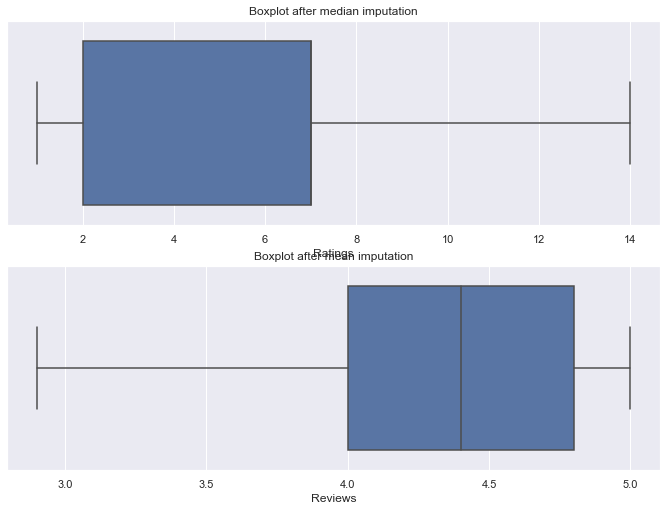

In [26]:
plt.subplot(2,1,1)
sns.boxplot(df['Ratings'])
plt.title("Boxplot after median imputation")
plt.subplot(2,1,2)
sns.boxplot(df['Reviews'])
plt.title("Boxplot after mean imputation")

In [27]:
corr_mat = df.corr()
corr_mat

,Reviews,Ratings,Price,EditionYears,Genre_Action & Adventure (Books),Genre_Biographies & Autobiographies (Books),Genre_Comics & Mangas (Books),Genre_Contemporary Fiction (Books),"Genre_Crime, Thriller & Mystery (Books)",Genre_Design,...,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
Reviews,1.000000,-0.202461,0.136863,-0.000916,-0.006188,0.023435,0.040794,-0.071796,-0.066666,0.041992,...,0.056522,-0.006347,0.088301,-0.021805,-0.101292,0.051037,-0.051556,-0.017419,-0.053086,0.061939
Ratings,-0.202461,1.000000,-0.154562,-0.005140,0.015920,0.063261,-0.000777,0.041767,0.028077,-0.024388,...,-0.041686,0.154751,-0.040116,-0.020205,0.062681,-0.081428,0.043230,-0.005806,0.003244,-0.089575
Price,0.136863,-0.154562,1.000000,0.024577,-0.097419,-0.038656,-0.010640,-0.065278,-0.076855,0.105278,...,0.118747,-0.101540,0.089171,0.175736,-0.117213,0.041757,-0.046355,-0.013901,-0.093160,0.074360
EditionYears,-0.000916,-0.005140,0.024577,1.000000,0.011825,-0.010653,-0.022723,-0.016035,-0.070510,0.012894,...,0.079086,-0.020113,-0.009760,-0.061602,-0.037079,0.119159,0.023383,-0.041231,-0.067616,0.015649
Genre_Action & Adventure (Books),-0.006188,0.015920,-0.097419,0.011825,1.000000,-0.106710,-0.076412,-0.087535,-0.091042,-0.052620,...,-0.123961,-0.126890,-0.126655,-0.123000,0.021245,-0.120731,-0.137273,-0.093171,-0.067247,-0.120926
Genre_Biographies & Autobiographies (Books),0.023435,0.063261,-0.038656,-0.010653,-0.106710,1.000000,-0.045548,-0.052178,-0.054269,-0.031366,...,-0.036586,0.387216,-0.064727,-0.075263,-0.089214,0.004101,-0.081827,-0.022625,-0.079212,0.181262
Genre_Comics & Mangas (Books),0.040794,-0.000777,-0.010640,-0.022723,-0.076412,-0.045548,1.000000,-0.037364,-0.038861,-0.022461,...,-0.024371,-0.058703,0.471088,-0.053893,-0.062532,0.003076,-0.058594,-0.042344,-0.053515,-0.051616
Genre_Contemporary Fiction (Books),-0.071796,0.041767,-0.065278,-0.016035,-0.087535,-0.052178,-0.037364,1.000000,-0.044517,-0.025730,...,-0.059267,-0.048005,-0.055329,-0.061738,0.366863,0.034012,-0.064370,-0.048507,0.022657,-0.049954
"Genre_Crime, Thriller & Mystery (Books)",-0.066666,0.028077,-0.076855,-0.070510,-0.091042,-0.054269,-0.038861,-0.044517,1.000000,-0.026761,...,-0.064691,-0.069942,-0.055705,-0.064212,0.562577,-0.057930,-0.064501,-0.046943,-0.062127,-0.061499
Genre_Design,0.041992,-0.024388,0.105278,0.012894,-0.052620,-0.031366,-0.022461,-0.025730,-0.026761,1.000000,...,0.219005,-0.022613,0.009534,0.005885,-0.040945,0.012918,-0.026971,-0.029160,-0.039061,-0.030590


In [28]:
corr_mat.Price.sort_values(ascending=False)

Price                                                1.000000
BookType_Hardcover                                   0.238766
BookCategory_Computing, Internet & Digital Media     0.175736
Genre_Others                                         0.143879
Reviews                                              0.136863
BookCategory_Arts, Film & Photography                0.118747
Genre_Design                                         0.105278
BookCategory_Comics & Mangas                         0.089171
BookCategory_Sports                                  0.074360
BookType_Others                                      0.061266
BookCategory_Humour                                  0.041757
Genre_Mangas                                         0.035953
Genre_Music Books                                    0.024856
EditionYears                                         0.024577
BookType_Sheet music                                 0.021481
Genre_Humour (Books)                                 0.011323
BookType

In [29]:
df['EditionYears'].min()

3.0

In [30]:
# #Scaling 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(X)



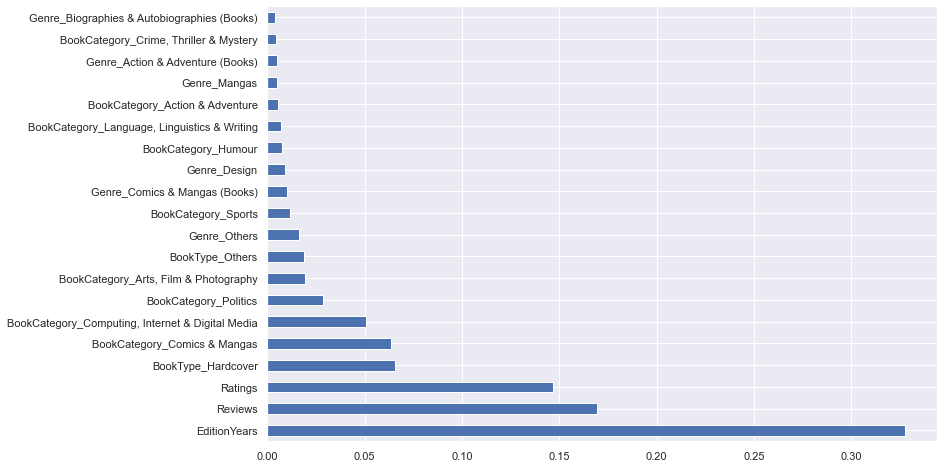

In [141]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'],axis=1)
y = df['Price']
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [34]:
# split into train test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['Price'],axis=1)
y = df['Price']
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# lets scale the data using MinMaxScaler

# scaler = MinMaxScaler()
# cols = ['Reviews', 'Ratings']
# # lets fit_transform the train data
# X_train[cols] = scaler.fit_transform(X_train[cols])

# # Log transformation on y_train
# #y_train = np.log1p(y_train)

# # We only transform the test data

# X_test[cols] = scaler.transform(X_test[cols])
# #y_test = np.log1p(y_test)

In [55]:
# Lets use LinearRegression to make a simple model

model = LGBMRegressor(verbosity = 1, objective = 'regression')
model.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 4989, number of used features: 30
[LightGBM] [Info] Start training from score 560.868377


LGBMRegressor(objective='regression', verbosity=1)

In [ ]:
y_preds = grid.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_preds, y_test))

print('Validation set score: ', 1 - np.sqrt(np.square(np.log10(y_preds +1) - np.log10(y_test +1)).mean()))

In [36]:
# Lets write a utility method to collate various metrics of the model after prediction

def model_metrics(y_train,y_pred_train,y_test,y_pred_test):

    # RMSE on train data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_score_train = r2_score(y_train, y_pred_train)
    print('RMSE for train:',rmse_train)
    print('R2 score for train:',r2_score_train)
    print('Validation score for train: ', 1 - np.sqrt(np.square(np.log10(y_pred_train +1) - np.log10(y_train +1)).mean()))

    # RMSE on test data
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_score_test = r2_score(y_test, y_pred_test)
    print('RMSE for test:',rmse_test)
    print('R2 score for test:',r2_score_test)
    print('Validation score for test: ', 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_test +1)).mean()))

In [37]:
# Lets make predictions on the train and test data

# predictions on train data
y_pred_train = lm.predict(X_train)

# predictions on test data
y_pred_test = lm.predict(X_test)

model_metrics(y_train,y_pred_train,y_test,y_pred_test)

RMSE for train: 634.3693224316836
R2 score for train: 0.17473866572071828
Validation score for train:  0.6832725643924128
RMSE for test: 602.3567498317493
R2 score for test: 0.1569417124393251
Validation score for test:  0.6869858207454866


In [ ]:
# lets select top 15 of 30 features using RFE then do a RIDGE and  LASSO regularization

# Lets select top 15 featues using RFE

lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# select top 15 features
rfe = RFE(lm2, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Top features selected by RFE
top_cols = X_train.columns[rfe.support_]
top_cols

In [ ]:
# Lets make predictions on the train and test data for RFE

# predictions on train data
y_pred_train = rfe.predict(X_train)

# predictions on test data
y_pred_test = rfe.predict(X_test)

# Lets print different model metrics
model_metrics(y_train,y_pred_train,y_test,y_pred_test)

In [152]:
# df.head()
X.shape

(6237, 31)

In [148]:
# sns.pairplot(data=[['Reviews','Ratings','EditionYears','Price']], diag_kind='kde')

<AxesSubplot:>

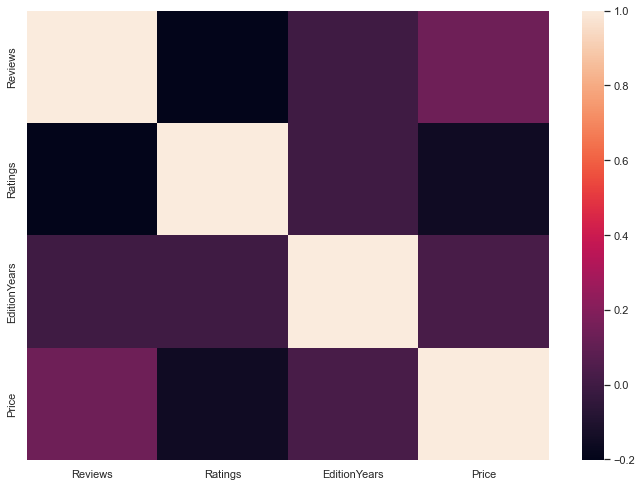

In [149]:
sns.heatmap(df[['Reviews','Ratings','EditionYears','Price']].corr())

<AxesSubplot:xlabel='Ratings', ylabel='Density'>

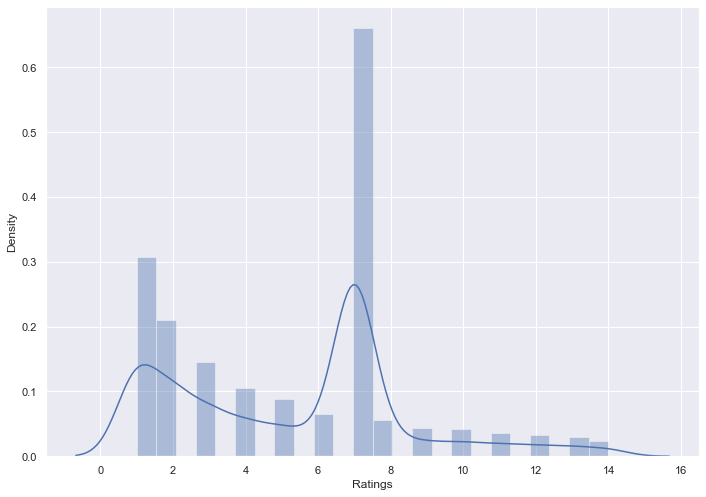

In [150]:
sns.distplot(df['Ratings'])

In [157]:
import numpy as np
from scipy import stats
  
# transform training data & save lambda value


from sklearn.model_selection import train_test_split
X = df.drop(['Price'],axis=1)
y = df['Price']
y=y.astype('int')


from sklearn.svm import SVR
model = SVR(kernel ='rbf', C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

SVR(epsilon=0.2)

In [56]:
y_pred = model.predict(X_test)

In [57]:
model.score(X_test, y_test)

0.1240554178390667

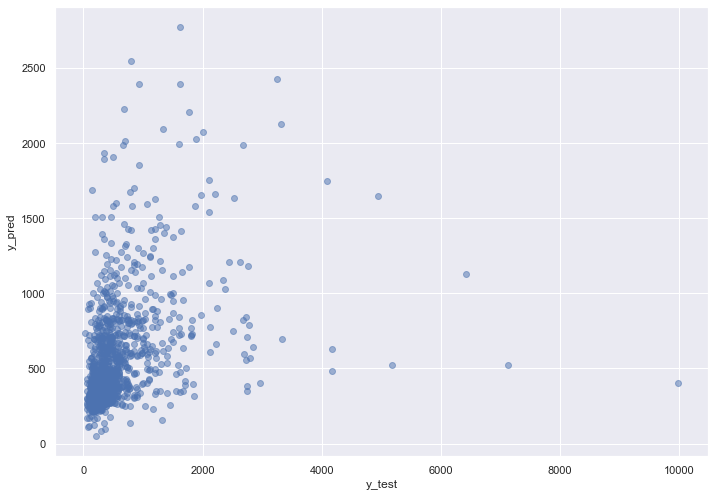

In [58]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 412.3929166666667
MSE: 772079.8578762821
RMSE: 878.6807485522156


In [50]:
878.6807485522156/(max(y)-min(y))

0.062428472366054394

In [51]:
metrics.r2_score(y_test, y_pred)

-0.7939579626743065